In [1]:
# !pip install diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 32.4 MB/s eta 0:00:00


In [2]:
from diffusers import DDPMPipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
ddpm = DDPMPipeline.from_pretrained('google/ddpm-celebahq-256').to('cuda')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/180 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors not found


Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/455M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/790 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--google--ddpm-celebahq-256/snapshots/cd5c944777ea2668051904ead6cc120739b86c4d: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--google--ddpm-celebahq-256/snapshots/cd5c944777ea2668051904ead6cc120739b86c4d.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [4]:
image = ddpm(num_inference_steps=30).images[0]

  0%|          | 0/30 [00:00<?, ?it/s]

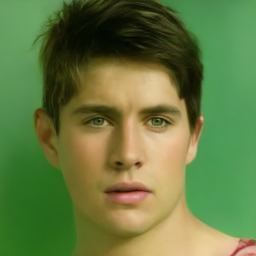

In [5]:
image

In [6]:
from diffusers import DDPMScheduler, UNet2DModel

In [7]:
scheduler = DDPMScheduler.from_pretrained('google/ddpm-celebahq-256')

In [8]:
model = UNet2DModel.from_pretrained('google/ddpm-celebahq-256').to('cuda')

An error occurred while trying to fetch google/ddpm-celebahq-256: google/ddpm-celebahq-256 does not appear to have a file named diffusion_pytorch_model.safetensors.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [9]:
scheduler.set_timesteps(50)

In [10]:
scheduler.timesteps

tensor([980, 960, 940, 920, 900, 880, 860, 840, 820, 800, 780, 760, 740, 720,
        700, 680, 660, 640, 620, 600, 580, 560, 540, 520, 500, 480, 460, 440,
        420, 400, 380, 360, 340, 320, 300, 280, 260, 240, 220, 200, 180, 160,
        140, 120, 100,  80,  60,  40,  20,   0])

In [11]:
import torch

In [12]:
sample_size = model.config.sample_size

In [13]:
sample_size

256

In [14]:
image.size

(256, 256)

In [15]:
#Noise for image
noise = torch.randn((1, 3, sample_size, sample_size), device='cuda')

In [16]:
input_i = noise

In [17]:
for t in scheduler.timesteps:
  with torch.no_grad():
    noisy_residual = model(input_i, t).sample

  previous_noisy_sample = scheduler.step(noisy_residual, t, input_i).prev_sample

  input_i = previous_noisy_sample

In [18]:
input_i.shape

torch.Size([1, 3, 256, 256])

In [19]:
from PIL import Image
import numpy as np

In [20]:
image = (input_i / 2 + 0.5).clamp(0, 1).squeeze()

In [21]:
image = (image.permute(1, 2, 0) * 255).round().to(torch.uint8).cpu().numpy()

In [22]:
image = Image.fromarray(image)

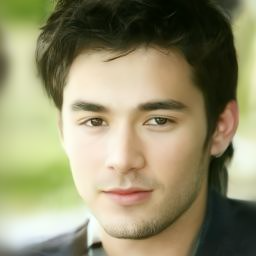

In [23]:
image